# Tutorial 5

In [2]:
import LinearAlgebra as linalg
import Plots as plt

Consider the following set of points on the x-y plane

|  x  |  y  |
|-----|-----|
|  1  |  2  |
|  2  | 3.35631 |
| -0.5 | 0.76225 |
| -2 | 0.126 |
|  2  | 4.2563 |

1. Find the <b>linear</b> function that minimizes the squared residuals (least square regression) of the 5 nodes given above.

In [25]:
X = [1 2 -0.5 -2 2]';
Y = [2 3.35631 0.76225 0.126 4.2563]';

A = [X'*X sum(X); sum(X) 5];
b = [X'*Y; sum(Y)];
Coeff_linear = A \ b;

display(Coeff_linear)

2×1 Matrix{Float64}:
 0.94513875
 1.6276026250000004

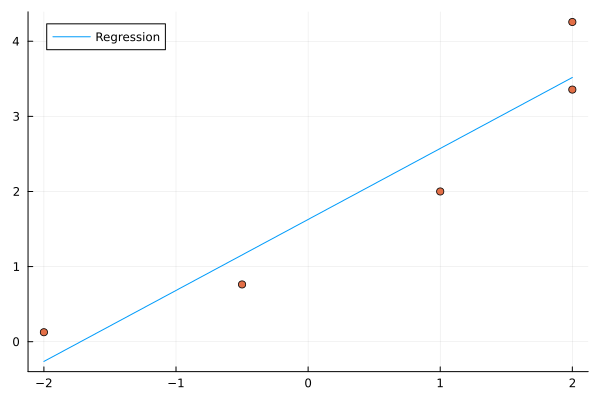

In [26]:
f(x) = @. Coeff_linear[1]*x+Coeff_linear[2];
s = plt.plot(X,f(X),label="Regression")
plt.scatter!(X,Y,label=false)

plt.display(s)

2. Find the <b>exponential</b> function that minimizes the squared residuals of the 5 nodes given above. The exponential function must have the same structure as the following:

$$ y = b \cdot e^{ax} $$

In [27]:
# Transform Y to ln(Y) for linearization
Y_prime = log.(Y);

# Set up the system of equations for linear regression (solving for a and ln(b))
A = [X'*X sum(X); sum(X) length(X)];
b = [X'*Y_prime; sum(Y_prime)];
Coeff_exp = A \ b;

# Extract parameters
a = Coeff_exp[1];  # slope
ln_b = Coeff_exp[2];  # intercept in log form

# Recover b from ln(b)
b = exp(ln_b);

# Display results
display(Coeff_exp)

2×1 Matrix{Float64}:
  0.8154667754334266
 -0.20584628573618038

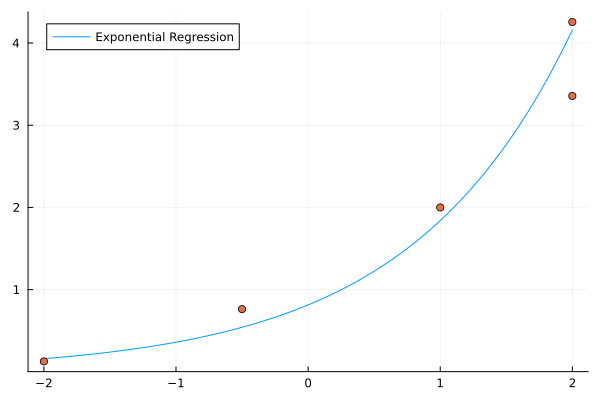

In [24]:
# Define the exponential function
p(x) = @. b * exp(a * x);
x2 = -2:0.05:2;
# Plot the results
s = plt.plot(x2, p(x2), label="Exponential Regression")
plt.scatter!(X, Y, label=false)
plt.display(s)

3. Plot the 5 nodes, the linear and the exponential best fit functions in the range [-3, 3].

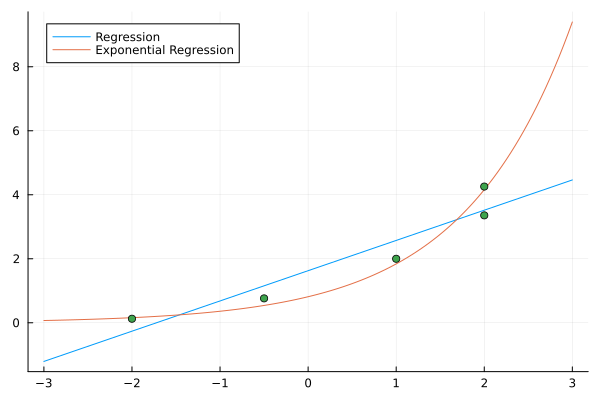

In [28]:
x3 = -3:0.05:3;

s = plt.plot(x3,f(x3),label="Regression")
plt.plot!(x3, p(x3), label="Exponential Regression")
plt.scatter!(X,Y,label=false)

plt.display(s)

4. Compute the maximum absolute error (residual) of the two fit functions in the 5 nodes. Which of the two has the highest error? If you sum the residual of all the five nodes, which has the highest cumulative residual? 

<b>Note</b>: It is possible to rewrite the exponential function to obtain a linear one. (_Hint_: Try to apply a logarithm.)

<b>Note2</b>: In Julia the function `log` is the natural logarithm, whil`log10` is the based 10 logarithm.

<b>Note3</b>: Be careful how you write the nodes array. Should they be row arrays or column ones?

In [36]:
linearM = f(X) - Y;
expM = p(X) - Y;

linearMax = maximum(abs.(linearM))
expMax = maximum(abs.(expM))

display(linearMax)
display(expMax)

linearSum = sum(abs.(linearM))
expSum = sum(abs.(expM))

display(linearSum)
display(expSum)


# linearR = linalg.norm(linearM);
# expR = linalg.norm(expM);

0.738419875

0.8019106945959016

2.2541895000000007

1.3144272723457646